# Необходимые библиотеки

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 9.1.4

In [27]:

def f(x):
    return np.exp(x) - 2 * np.sin(x)

def df(x):
    return np.exp(x) - 2 * np.cos(x)

def d2f(x):
    return np.exp(x) + 2 * np.sin(x)

def newton_min_max(f, df, d2f, a, b, epsilon):
    # Начальные значения для минимума и максимума
    x_min = a
    x_max = b

    # Количество итераций
    iterations_min = 0
    iterations_max = 0

    # Находим минимум
    while np.abs(df(x_min)) > epsilon:
        x_min = x_min - df(x_min) / d2f(x_min)
        iterations_min += 1

    # Находим максимум
    while np.abs(df(x_max)) > epsilon:
        x_max = x_max - df(x_max) / d2f(x_max)
        iterations_max += 1
        '''
            - x_min : Аргумент, при котором достигается минимум функции.
            - min_val : Значение функции в точке минимума.
            - iterations_min : Количество итераций для нахождения минимума.
            - x_max : Аргумент, при котором достигается максимум функции.
            - max_val : Значение функции в точке максимума.
            - iterations_max : Количество итераций для нахождения максимума.
        '''

    return x_min, f(x_min), iterations_min, x_max, f(x_max), iterations_max

# Установка начальных значений
a = 0
b = 2
epsilon = 1e-6

# Поиск минимума и максимума
x_min, min_val, iterations_min, x_max, max_val, iterations_max = newton_min_max(f, df, d2f, a, b, epsilon)

# Вывод результатов
print("Минимум:")
print("x =", x_min)
print("Значение функции в минимуме f(x) =", min_val)
print("Количество итераций для нахождения минимума:", iterations_min)

print("\nМаксимум:")
print("x =", x_max)
print("Значение функции в максимуме f(x) =", max_val)
print("Количество итераций для нахождения максимума:", iterations_max)


Минимум:
x = 0.53978516090182
Значение функции в минимуме f(x) = 0.6877348155576746
Количество итераций для нахождения минимума: 5

Максимум:
x = 0.5397851620829291
Значение функции в максимуме f(x) = 0.6877348155576746
Количество итераций для нахождения максимума: 5


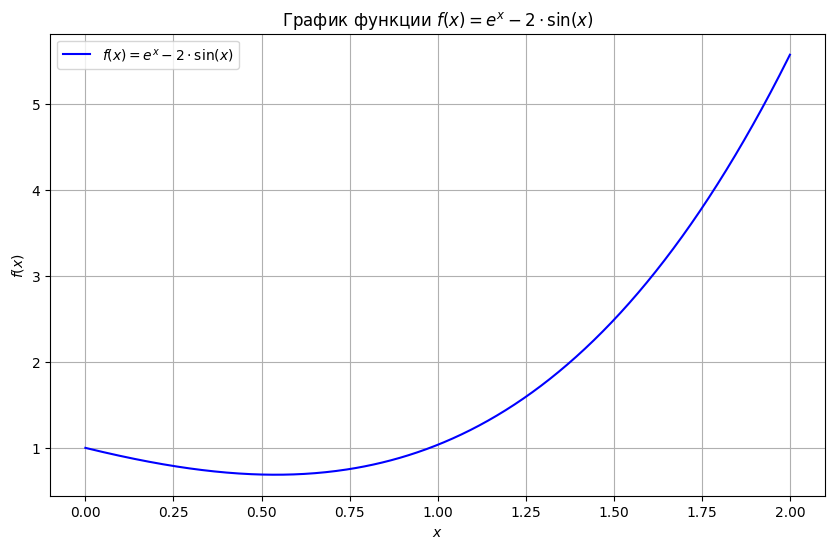

In [28]:
# График функции (для себя)

# Определение функции f(x)
def f(x):
    return np.exp(x) - 2 * np.sin(x)

# Генерация значений x на интервале [0, 2] для построения графика
x_values = np.linspace(0, 2, 400)
# Вычисление значений функции f(x)
y_values = f(x_values)

# Построение графика функции
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='$f(x) = e^x - 2 \cdot \sin(x)$', color='blue')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('График функции $f(x) = e^x - 2 \cdot \sin(x)$')
plt.grid(True)
plt.legend()
plt.show()

# Задание 9.2.2

In [ ]:
# Функция

def f(t):
    return (t + 1) * np.cos(t)

def minimize_interval(f, x1, x2, epsilon):
    """
    Находим минимум функции f(t) на заданном интервале [x1, x2]
    с использованием метода минимизации (деления отрезка пополам).

    Параметры:
        f (callable): Функция, для которой находим минимум.
        x1: Левый конец интервала.
        x2: Правый конец интервала.
        epsilon: Точность, определяющая критерий останова.

    Возвращает:
        tuple: Кортеж из следующих значений:
            - min_point (float): Аргумент, при котором достигается минимум функции.
            - min_value (float): Значение функции в точке минимума.
            - iterations (int): Количество итераций для нахождения минимума.
    """
    iterations = 0

    while np.abs(x2 - x1) > epsilon:
        x3 = (x1 + x2) / 2
        x4 = x3 + epsilon / 2

        if f(x3) < f(x4):
            x2 = x4
        else:
            x1 = x3

        iterations += 1

    return (x1 + x2) / 2, f((x1 + x2) / 2), iterations

# Пример использования функции для поиска минимума на интервале [0, 4]
x1 = 0
x2 = 4
epsilon = 1e-6

min_point, min_value, iterations = minimize_interval(f, x1, x2, epsilon)

print("Минимум:")
print("x =", min_point)
print("Значение функции в минимуме f(x) =", min_value)
print("Количество итераций для нахождения минимума:", iterations)


Минимум:
x = 3.366715856729268
Значение функции в минимуме f(x) = -4.256528822394635
Количество итераций для нахождения минимума: 23


# Задание 9.5.4

In [ ]:

# Функция
def f(x, y):
    return x**2 + 2 * y**2 + np.sin(x) - np.cos(y + 5)


"""
    Находит минимум функции f(x, y) на прямоугольнике [x1, x2] x [y1, y2]
    с использованием метода градиентного спуска
"""

def gradient_descent(f, x1, x2, y1, y2, epsilon):
    x = (x1 + x2) / 2  # Начальные значения x и y
    y = (y1 + y2) / 2

    iterations = 0

    while True:
        # Вычисляем градиент функции по переменным x и y
        grad_x = (f(x + epsilon, y) - f(x, y)) / epsilon
        grad_y = (f(x, y + epsilon) - f(x, y)) / epsilon

        # Обновляем значения x и y в направлении, противоположном градиенту
        x -= epsilon * grad_x
        y -= epsilon * grad_y

        iterations += 1

        # Проверяем критерий останова
        if np.sqrt(grad_x**2 + grad_y**2) < epsilon:
            break

    """
    Кортеж из следующих значений:
            - min_x: Значение переменной x, при котором достигается минимум функции.
            - min_y: Значение переменной y, при котором достигается минимум функции.
            - min_val: Значение функции в точке минимума f(min_x, min_y).
            - iterations: Количество итераций для нахождения минимума.
    """

    return x, y, f(x, y), iterations

x1, x2 = -2, 2
y1, y2 = -2, 2
epsilon = 1e-6

min_x, min_y, min_val, iterations = gradient_descent(f, x1, x2, y1, y2, epsilon)

print("Минимум:")
print("x =", min_x)
print("y =", min_y)
print("Значение функции в минимуме f(x, y) =", min_val)
print("Количество итераций для нахождения минимума:", iterations)


Минимум:
x = -0.45018370061626733
y = 0.21864140337072469
Значение функции в минимуме f(x, y) = -0.6217605978470849
Количество итераций для нахождения минимума: 5747978


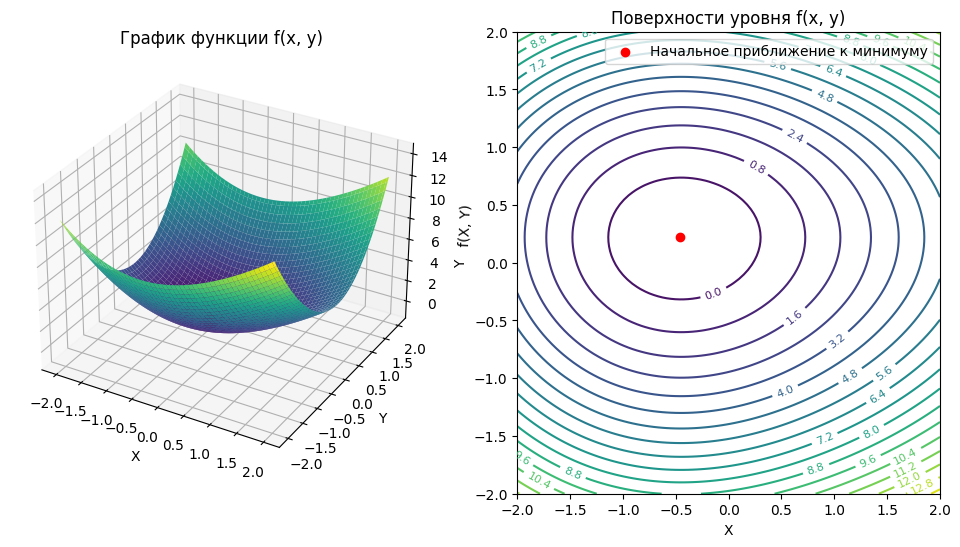

In [ ]:
# Создание данных для построения
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение графика функции
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('График функции f(x, y)')

# Поиск точки начального приближения к минимуму
min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
min_x, min_y = X[min_idx], Y[min_idx]
ax.scatter(min_x, min_y, f(min_x, min_y), color='red', s=100, label='Начальное приближение к минимуму')

# Построение поверхностей уровня
ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Поверхности уровня f(x, y)')

# Поиск точки начального приближения к минимуму
ax.scatter(min_x, min_y, color='red', label='Начальное приближение к минимуму')


plt.legend()
plt.show()

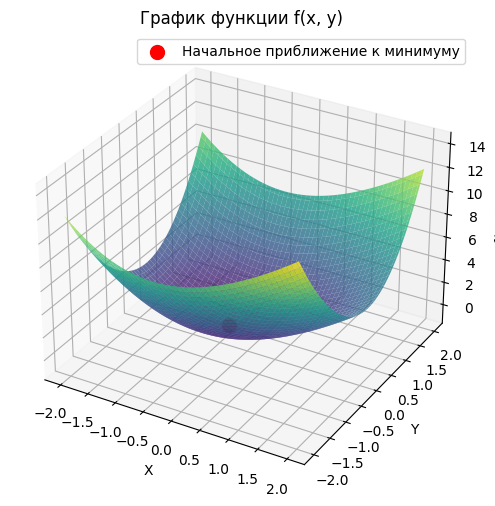

In [ ]:
# Создание данных для построения
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Поиск точки начального приближения к минимуму
min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
min_x, min_y = X[min_idx], Y[min_idx]


# Построение графика функции
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(min_x, min_y, f(min_x, min_y), color='red', s=100, label='Начальное приближение к минимуму')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('График функции f(x, y)')
ax.legend()
plt.show()

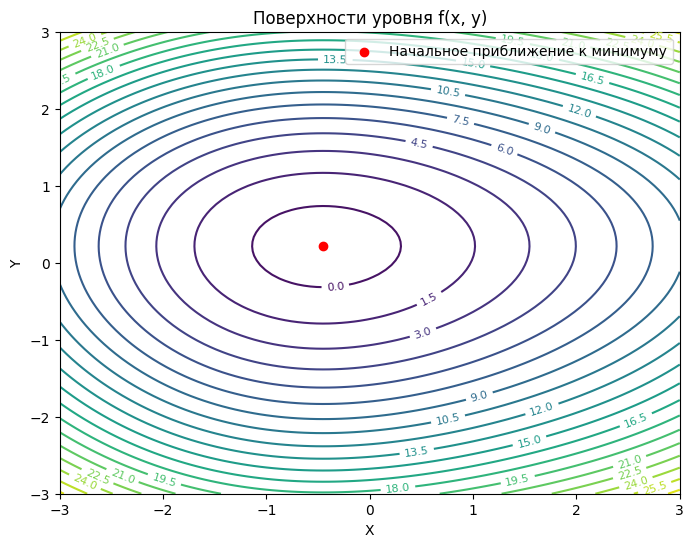

In [ ]:
# Создание данных для построения
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Поиск точки начального приближения к минимуму
min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
min_x, min_y = X[min_idx], Y[min_idx]


# Построение поверхностей уровня
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)
ax.scatter(min_x, min_y, color='red', label='Начальное приближение к минимуму')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Поверхности уровня f(x, y)')

# Установка нового масштаба для осей x и y
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.legend()
plt.show()

# Задание 9.6.4

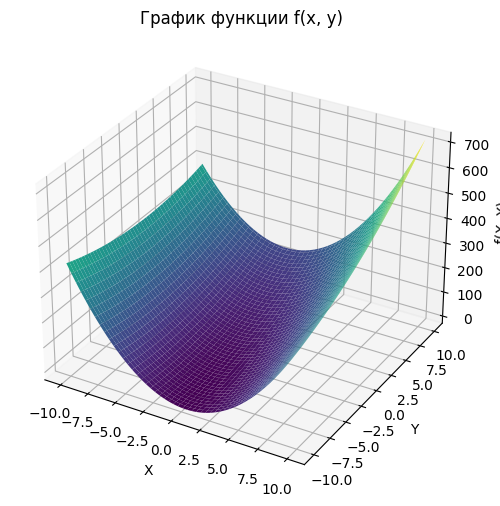

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Определение функции f(x, y)
def f(x, y):
    a11 = 4
    a12 = 0.5
    a22 = 0.5
    a13 = -2.25
    a23 = -1.75

    return a11 * x**2 + 2 * a12 * x * y + a22 * y**2 + 2 * a13 * x + 2 * a23 * y + 11 * x + 12 * y + 22

# Создание данных для построения
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение графика функции
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('График функции f(x, y)')
plt.show()


In [ ]:
# Определение градиента функции f(x, y)
def grad_f(x, y):
    a11 = 4
    a12 = 0.5
    a22 = 0.5
    a13 = -2.25
    a23 = -1.75

    grad_x = 2 * a11 * x + 2 * a12 * y + 2 * a13 + 11
    grad_y = 2 * a12 * x + 2 * a22 * y + 2 * a23 + 12

    return np.array([grad_x, grad_y])

# Определение Гессиана функции f(x, y)
def hessian_f(x, y):
    return np.array([[8, 0], [0, 1]])

# Метод Ньютона для нахождения минимума
def newton_method(f, grad_f, hessian_f, x0, y0, epsilon):
    iterations = 0
    while True:
        grad = grad_f(x0, y0)
        hessian_inv = np.linalg.inv(hessian_f(x0, y0))
        delta = np.dot(hessian_inv, grad)
        x0 -= delta[0]
        y0 -= delta[1]
        iterations += 1
        if np.linalg.norm(grad) < epsilon:
            break
    return x0, y0, f(x0, y0), iterations

# Начальное приближение
x0 = 0
y0 = 0
epsilon = 1e-6

# Нахождение минимума с помощью метода Ньютона
min_x, min_y, min_val, iterations = newton_method(f, grad_f, hessian_f, x0, y0, epsilon)

print("Минимум:")
print("x =", min_x)
print("y =", min_y)
print("Значение функции в минимуме f(x, y) =", min_val)
print("Количество итераций для нахождения минимума:", iterations)

Минимум:
x = 0.2857142202556133
y = -8.785714268684387
Значение функции в минимуме f(x, y) = -14.410714285714278
Количество итераций для нахождения минимума: 17


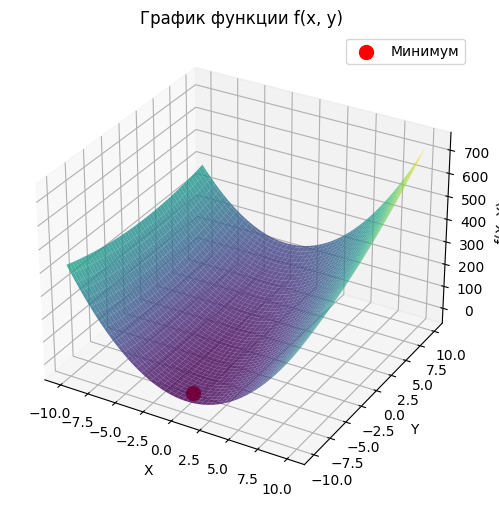

In [ ]:
# Создание данных для построения графика
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение графика функции
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('График функции f(x, y)')

# Отображение найденного минимума
ax.scatter(min_x, min_y, min_val, color='red', s=100, label='Минимум')

plt.legend()
plt.show()